## Library

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.metrics  import r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import random
from sklearn.preprocessing import MinMaxScaler


## Dataset

In [3]:
#import dataset banjir tahun 2019
df_banjir_2019 = pd.read_csv("https://data.jakarta.go.id/dataset/46a1ef1a-4143-4c6d-b91d-fa20044660b2/resource/06748d424f3311503bf5d449f08c99d3/download/Data-Rekapitulasi-Kejadian-Banjir-Tahun-2019.csv")
            


In [4]:
#import dataset banjir tahun 2020
df_banjir_2020 = pd.read_csv("https://data.jakarta.go.id/dataset/46a1ef1a-4143-4c6d-b91d-fa20044660b2/resource/8ab1b8ccbed6e2555e577bc487f0981b/download/Data-Rekapitulasi-Kejadian-Banjir-Tahun-2020.csv")

In [5]:
#base dataset Januari 2018
df_ref2 = pd.read_csv("https://data.jakarta.go.id/dataset/46a1ef1a-4143-4c6d-b91d-fa20044660b2/resource/d4cdcb64-d992-4741-843c-2ff46358a63b/download/Data-Rekapitulasi-Kejadian-Banjir-Tahun-2018.csv")


## Preprocessing Data

In [6]:
#menghapus variabel yang tidak diperlukan pada base dataset
df_ref2 = df_ref2.drop(["korban_meninggal",  "korban_hilang", "korban_luka_berat",  "korban_luka_ringan",  "jumlah_jiwa_pengungsi_tertinggi",  "jumlah_tempat_pengungsian", "jumlah_nilai_kerugian"], axis=1)



In [7]:
#mengconvert column yang memiliki value dengan format yang berbeda
df_ref2["ketinggian_air_max"] = df_ref2["rata_rata_ketinggian_air"].apply(lambda st: st[st.find("-")+1:]).astype("int64")
df_ref2["ketinggian_air_min"] = df_ref2["rata_rata_ketinggian_air"].apply(lambda st: st[:st.find("-")])
df_ref2.loc[6, "ketinggian_air_min"] = "0"
df_ref2.loc[7, "ketinggian_air_min"] = "0"
df_ref2.loc[8, "ketinggian_air_min"] = "0"


df_ref2["ketinggian_air_min"] = df_ref2["ketinggian_air_min"].astype("int64")


df_ref2["ketinggian_air_avg"] = ((df_ref2["ketinggian_air_min"]+df_ref2["ketinggian_air_max"])/2)

#product_catalogue.isnull()
#product_catalogue.dropna()
#product_catalogue.fillna(0)
#product_catalogue.interpolate(method="linear", limit_direction = "forward")
#scaler = MinMaxScaler(feature_range=(0,1))
#product_catalogue["Profit Margin"] = scaler.fit_transform(product_catalogue["Profit Margin"].values.reshape(-1,1))


In [8]:
#mengconvert column yang memiliki value dengan format yang berbeda
df_ref2.loc[0, "lama_genangan"] = "2"
df_ref2.loc[1, "lama_genangan"] = "6"
df_ref2["lama_genangan"] = df_ref2["lama_genangan"].astype("int64")


In [9]:
#menghapus variabel yang tidak diperlukan pada dataset 2019
df_banjir_2019 = df_banjir_2019.drop(["korban_meninggal",  "korban_hilang", "korban_luka_berat",  "korban_luka_ringan",  "jumlah_jiwa_pengungsi_tertinggi",  "jumlah_tempat_pengungsian", "jumlah_nilai_kerugian"], axis=1)


In [10]:
#membersihkan data dengan format yang salah
df_banjir_2019["lama_genangan"] = df_banjir_2019["lama_genangan"].apply(lambda st: st[:st.find("h")])


In [11]:
#mengganti variabel yang hilang 
df_banjir_2019.loc[5, "lama_genangan"] = "0"
df_banjir_2019.loc[6, "lama_genangan"] = "0"
df_banjir_2019.loc[7, "lama_genangan"] = "0"
df_banjir_2019.loc[8, "lama_genangan"] = "0"
df_banjir_2019.loc[10, "lama_genangan"] = "0"

df_banjir_2019["lama_genangan"] = df_banjir_2019["lama_genangan"].astype("int64")


In [12]:
#membersihkan data dengan format yang salah
df_banjir_2019["ketinggian_air_max"] = df_banjir_2019["rata_rata_ketinggian_air"].apply(lambda st: st[st.find("d")+2:st.find("c")])
df_banjir_2019["ketinggian_air_min"] = df_banjir_2019["rata_rata_ketinggian_air"].apply(lambda st: st[:st.find(" ")])


In [13]:
df_banjir_2019.loc[5, "ketinggian_air_max"] = "0"
df_banjir_2019.loc[6, "ketinggian_air_max"] = "0"
df_banjir_2019.loc[7, "ketinggian_air_max"] = "0"
df_banjir_2019.loc[8, "ketinggian_air_max"] = "0"
df_banjir_2019.loc[10, "ketinggian_air_max"] = "0"

df_banjir_2019.loc[5, "ketinggian_air_min"] = "0"
df_banjir_2019.loc[6, "ketinggian_air_min"] = "0"
df_banjir_2019.loc[7, "ketinggian_air_min"] = "0"
df_banjir_2019.loc[8, "ketinggian_air_min"] = "0"
df_banjir_2019.loc[10, "ketinggian_air_min"] = "0"

In [14]:
df_banjir_2019["ketinggian_air_min"] = df_banjir_2019["ketinggian_air_min"].astype("int64")
df_banjir_2019["ketinggian_air_max"] = df_banjir_2019["ketinggian_air_max"].astype("int64")

#mencari rata-rata ketinggian air 
df_banjir_2019["ketinggian_air_avg"] = ((df_banjir_2019["ketinggian_air_min"]+df_banjir_2019["ketinggian_air_max"])/2)


In [15]:
#menghapus variabel yang tidak diperlukan dari dataset banjir 2020
df_banjir_2020 = df_banjir_2020.drop(["korban_meninggal",  "korban_hilang", "korban_luka_berat",  "korban_luka_ringan",  "jumlah_jiwa_pengungsi_tertinggi",  "jumlah_tempat_pengungsian", "jumlah_nilai_kerugian"], axis=1)


In [16]:
#membersihkan data dengan format yang berbeda
df_banjir_2020["ketinggian_air_max"] = df_banjir_2020["rata_rata_ketinggian_air"].apply(lambda st: st[st.find("d")+2:st.find("c")])
df_banjir_2020["ketinggian_air_min"] = df_banjir_2020["rata_rata_ketinggian_air"].apply(lambda st: st[:st.find(" ")])
df_banjir_2020["ketinggian_air_min"] = df_banjir_2020["ketinggian_air_min"].astype("int64")
df_banjir_2020["ketinggian_air_max"] = df_banjir_2020["ketinggian_air_max"].astype("int64")

#mencari rata-rata ketinggian air
df_banjir_2020["ketinggian_air_avg"] = ((df_banjir_2020["ketinggian_air_min"]+df_banjir_2020["ketinggian_air_max"])/2)




In [17]:
#membersihkan data dengan format yang berbeda
df_banjir_2020["lama_genangan"] = df_banjir_2020["lama_genangan"].apply(lambda st: st[-st.find("h")+1:-st.find("d")])

In [18]:
#mengganti variabel yang hilang
df_banjir_2020.loc[0, "lama_genangan"] = "4"
df_banjir_2020.loc[5, "lama_genangan"] = "1"
df_banjir_2020.loc[6, "lama_genangan"] = "1"
df_banjir_2020.loc[7, "lama_genangan"] = "1"
df_banjir_2020.loc[11, "lama_genangan"] = "1"

df_banjir_2020["lama_genangan"] = df_banjir_2020["lama_genangan"].astype("int64")


In [19]:
#membuat list data untuk dataset banjir 2019 dan 2020
dataset2 = [
            df_banjir_2019, df_banjir_2020
            ]

In [20]:
#concat base data set dan list data
for i in range(len(dataset2)):
  data = (dataset2[i])
  df_ref2 = pd.concat([df_ref2, data])

#meriset indek sehingga 
df_ref2.reset_index(drop=True, inplace=True)

In [21]:
#mengurutkan bulan sehingga tidak terjadi perulangan angka dari 1-12 kembali
for i in range(1,37):
    df_ref2.loc[i-1, "bulan"] = i

df_ref2["bulan"] = df_ref2["bulan"].astype("int64")


"""
bulan 1 = januari 2018
bulan 2 = februari 2018
bulan 3 = maret 2018
bulan 4 = april 2018
bulan 5 = mei 2018
.
.
.
.
.
bulan 32 = agustus 2020
bulan 33 = september 2020
bulan 34 = oktober 2020
bulan 35 = november 2020
bulan 36 = desember 2020
"""

'\nbulan 1 = januari 2018\nbulan 2 = februari 2018\nbulan 3 = maret 2018\nbulan 4 = april 2018\nbulan 5 = mei 2018\n.\n.\n.\n.\n.\nbulan 32 = agustus 2020\nbulan 33 = september 2020\nbulan 34 = oktober 2020\nbulan 35 = november 2020\nbulan 36 = desember 2020\n'

In [23]:
df_ref2 = df_ref2.drop(["rata_rata_ketinggian_air"], axis = 1)
print(df_ref2.to_string())
df_ref2.info()


KeyError: "['rata_rata_ketinggian_air'] not found in axis"

In [24]:
df2 = df_ref2.drop(["kelurahan","rw_terdampak","kk_terdampak","ketinggian_air_max","ketinggian_air_min"], axis = 1)
print(df2.to_string())
df2.info()


    bulan  kecamatan  lama_genangan  jiwa_terdampak  ketinggian_air_avg
0       1          5              2               0                22.5
1       2         24              6           19456               152.5
2       3          6              1            1000                55.0
3       4          6              1             988                47.5
4       5          8              1             716                80.0
5       6          5              1            1068                55.0
6       7          0              0               0                 0.0
7       8          0              0               0                 0.0
8       9          0              0               0                 0.0
9      10          4              1            1001                45.0
10     11         11              1            7597                52.5
11     12         14              1             877                51.5
12     13         14              2             453             

## Analisis Data

In [ ]:
df2.describe()

,bulan,kecamatan,lama_genangan,jiwa_terdampak,ketinggian_air_avg
count,36.000000,36.00000,36.000000,36.000000,36.000000
mean,18.500000,11.00000,1.277778,5519.416667,54.277778
std,10.535654,10.53701,1.185896,15519.229218,43.408269
min,1.000000,0.00000,0.000000,0.000000,0.000000
25%,9.750000,3.50000,1.000000,0.000000,31.875000
50%,18.500000,8.50000,1.000000,932.500000,53.750000
75%,27.250000,16.00000,2.000000,1942.250000,70.625000
max,36.000000,42.00000,6.000000,83406.000000,180.000000


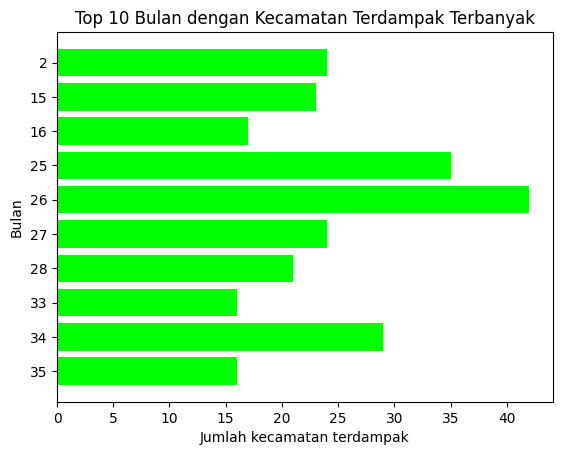

In [ ]:
df_sorted = df2.sort_values(by="kecamatan", ascending=False)
top_10_kecamatan = df_sorted.head(10)
top_10_kecamatan_bulan = top_10_kecamatan.sort_values(by="bulan", ascending=False)
top_10_kecamatan_bulan = top_10_kecamatan_bulan.head(10)

plt.barh(top_10_kecamatan_bulan["bulan"].astype(str), top_10_kecamatan_bulan["kecamatan"], height=0.8, color=(0,1,0))
plt.title("Top 10 Bulan dengan Kecamatan Terdampak Terbanyak")
plt.xlabel("Jumlah kecamatan terdampak")
plt.ylabel("Bulan")
plt.show()

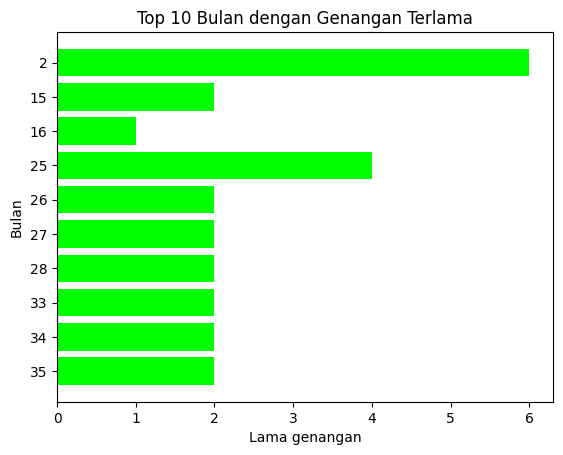

In [ ]:
df_sorted = df2.sort_values(by="lama_genangan", ascending=False)
top_10_lama_genangan = df_sorted.head(10)
top_10_lama_genangan_bulan = top_10_kecamatan.sort_values(by="bulan", ascending=False)
top_10_lama_genangan_bulan = top_10_lama_genangan_bulan.head(10)

plt.barh(top_10_lama_genangan_bulan["bulan"].astype(str),top_10_lama_genangan_bulan["lama_genangan"], height=0.8, color=(0,1,0))
plt.title("Top 10 Bulan dengan Genangan Terlama")
plt.xlabel("Lama genangan")
plt.ylabel("Bulan")
plt.show()

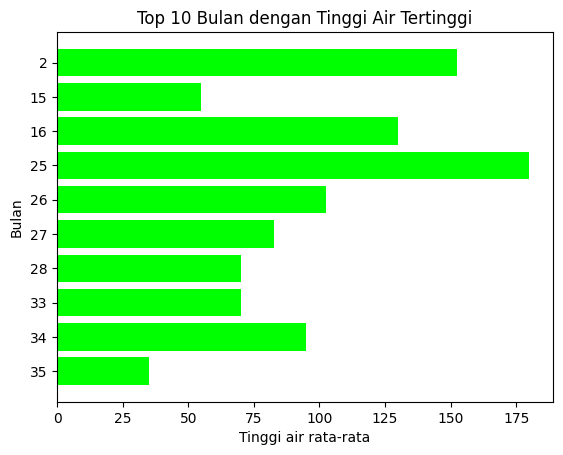

In [ ]:
df_sorted = df2.sort_values(by="ketinggian_air_avg", ascending=False)
top_10_ketinggian_air_avg = df_sorted.head(10)
top_10_ketinggian_air_avg_bulan = top_10_kecamatan.sort_values(by="bulan", ascending=False)
top_10_ketinggian_air_avg_bulan = top_10_ketinggian_air_avg_bulan.head(10)

plt.barh(top_10_ketinggian_air_avg_bulan["bulan"].astype(str),top_10_ketinggian_air_avg_bulan["ketinggian_air_avg"], height=0.8,color=(0,1,0))
plt.title("Top 10 Bulan dengan Tinggi Air Tertinggi")
plt.xlabel("Tinggi air rata-rata")
plt.ylabel("Bulan")
plt.show()

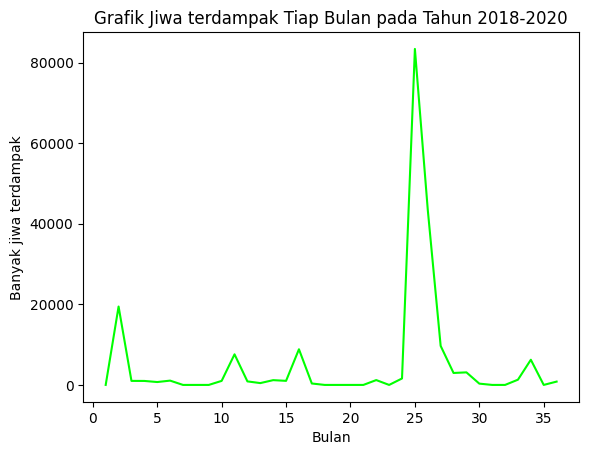

In [ ]:
plt.plot(df2["bulan"], df2["jiwa_terdampak"], color=(0,1,0))
plt.xlabel("Bulan")
plt.ylabel("Banyak jiwa terdampak")
plt.title("Grafik Jiwa terdampak Tiap Bulan pada Tahun 2018-2020")
plt.show()

In [ ]:
df2.corr()

,bulan,kecamatan,lama_genangan,jiwa_terdampak,ketinggian_air_avg
bulan,1.000000,0.299833,0.036588,0.118682,0.128477
kecamatan,0.299833,1.000000,0.724815,0.684019,0.795783
lama_genangan,0.036588,0.724815,1.000000,0.559734,0.797695
jiwa_terdampak,0.118682,0.684019,0.559734,1.000000,0.675256
ketinggian_air_avg,0.128477,0.795783,0.797695,0.675256,1.000000


<Axes: >

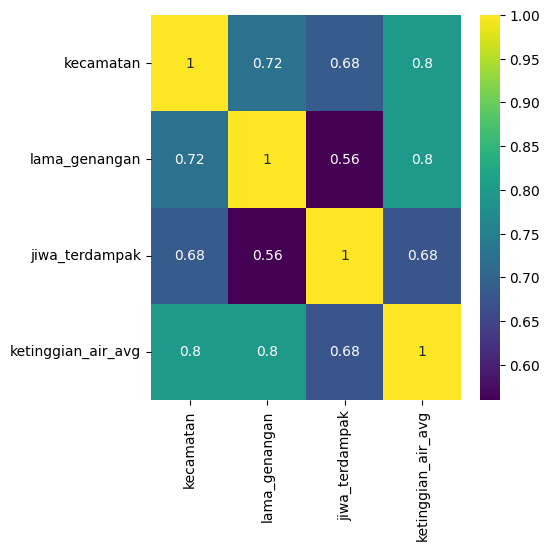

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df2[["kecamatan","lama_genangan","jiwa_terdampak","ketinggian_air_avg"]].corr(), annot=True,  cmap="viridis")

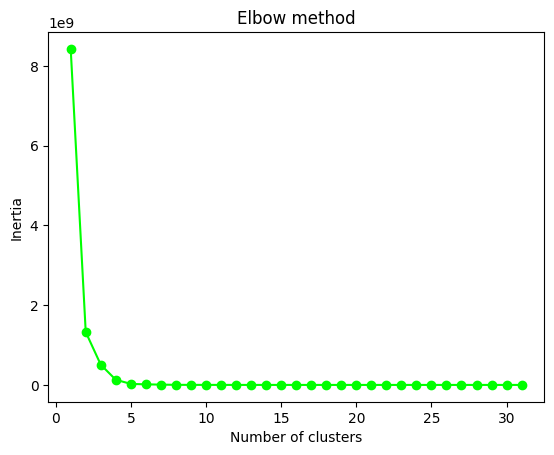

In [ ]:
data = df2
inertias = []

for i in range(1,32):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,32), inertias, marker='o', color=(0, 1, 0))
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

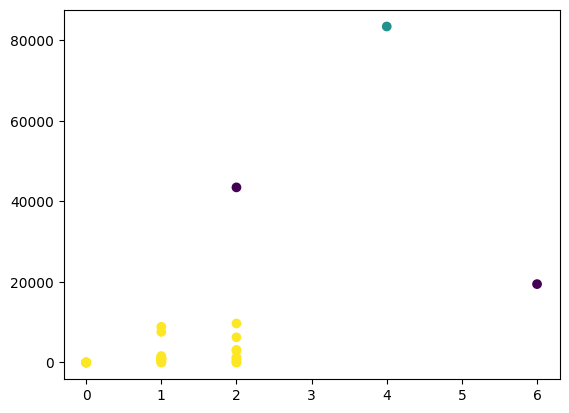

In [ ]:
random.seed(0)
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)
random_seed = 0

plt.scatter(df2["lama_genangan"],df2["jiwa_terdampak"], c=kmeans.labels_)
plt.show()

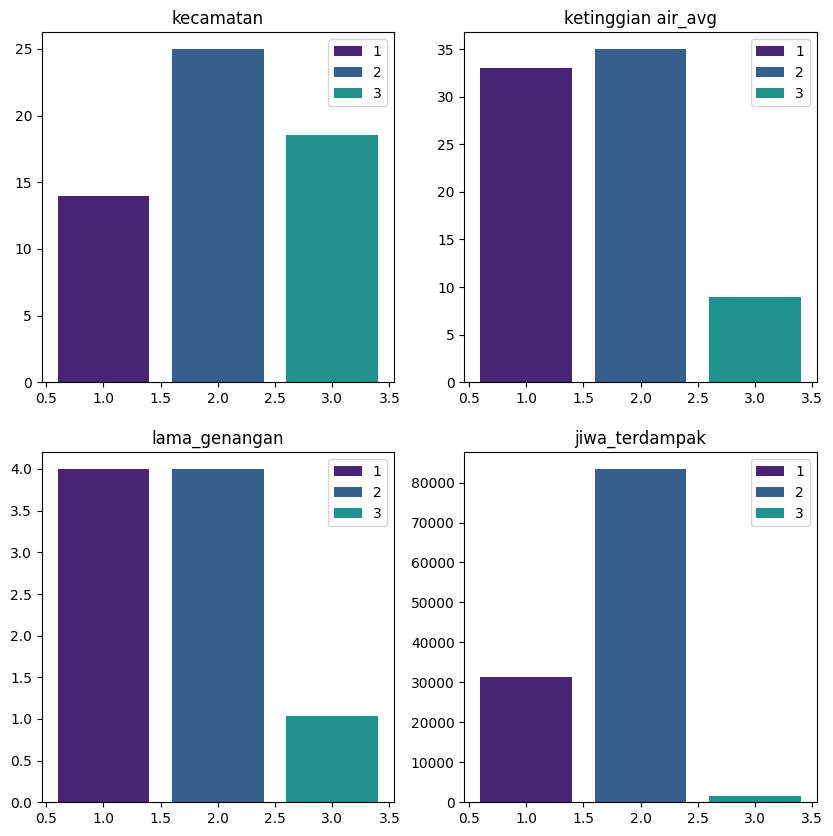

In [ ]:
x = df2.columns
df2["cluster"] = pd.Series(y_kmeans, index=df2.index)


def kcluster(n):
    value = []
    for i in x:
        random.seed(0)
        value.append(df2.loc[df2["cluster"]==n,:].describe().loc["mean",i])
    return value

df2.loc[df2["cluster"] == 2, "cluster"] = 3
df2.loc[df2["cluster"] == 1, "cluster"] = 2
df2.loc[df2["cluster"] == 0, "cluster"] = 1

cl1 = kcluster(1)
cl2 = kcluster(2)
cl3 = kcluster(3)




plt.figure(figsize=(10,10))
label = ["kecamatan", "ketinggian air_avg", "lama_genangan", "jiwa_terdampak"]
colors = plt.get_cmap("viridis")


for i in range(1,5):
    random.seed(0)
    plt.subplot(2, 2, i)
    fig1 = plt.bar(1,cl1[i-1],color=colors(0.1))
    fig2 = plt.bar(2,cl2[i-1],color=colors(0.3))
    fig3 = plt.bar(3,cl3[i-1],color=colors(0.5))
  
    plt.title(label[i-1])
    plt.legend(["1","2","3","4"])

plt.show()

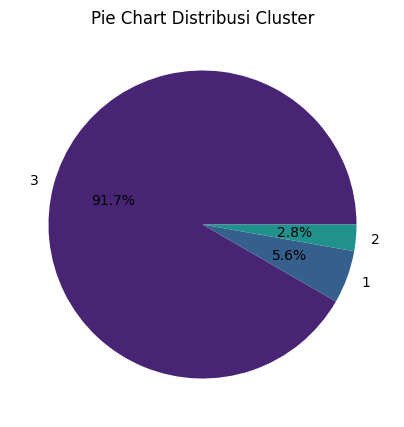

In [ ]:
distribusi = df2["cluster"].value_counts(normalize=True)
colors = plt.get_cmap("viridis")

plt.figure(figsize=(5, 5))
plt.pie(distribusi, labels=distribusi.index, autopct='%1.1f%%', colors=[colors(0.1), colors(0.3), colors(0.5)])
plt.title("Pie Chart Distribusi Cluster") 
plt.show()

In [ ]:
silhouette_score = silhouette_score(df2, y_kmeans)
print("Silhouette Score:", silhouette_score)

Silhouette Score: 0.8433746596286208
